# SIMPLE NEURAL NETWORK FOR DIGIT RECOGNITION

### Importing the necessary libraries

In [27]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the Digit Dataset

In [28]:
digits = load_digits()
X = digits.data
y = digits.target

### Normalize the Features

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Convert to Pytorch tensors

In [30]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

### Train-test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining Simple Neural Network

In [32]:
class SimpleDigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net =  nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )
    def forward(self, x):
        return self.net(x)

### Training the Function

In [33]:
def train_model(loss_fn, loss_name, color):
    model = SimpleDigitClassifier()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    losses = [] 

    for epoch in range(200):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
    
    #  Plot fitted training loss curve
    plt.plot(losses, label=F"{loss_name}", color=color)

    return model, losses


### Training the Model

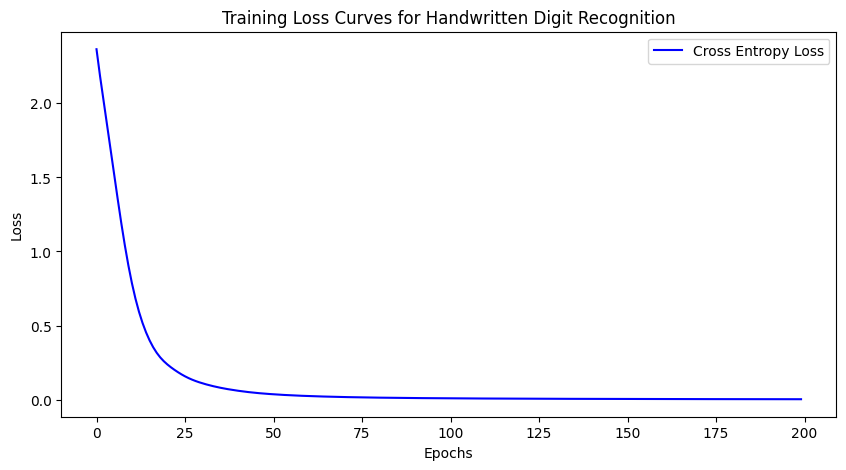

In [34]:
plt.figure(figsize=(10,5))
model, losses = train_model(nn.CrossEntropyLoss(), "Cross Entropy Loss", "blue")

plt.title("Training Loss Curves for Handwritten Digit Recognition")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Testing accuracy

In [35]:
with torch.no_grad():
    test_logits = model(X_test)
    predicted = torch.argmax(test_logits, dim=1)
    accuracy = (predicted == y_test).float().mean()

print(f"\nTest Accuracy: {accuracy.item()*100:.2f}%\n")


Test Accuracy: 97.22%

